In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("live-birth.csv", thousands=",") #header=None, 
labour_df = pd.read_csv("unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
labour_df.head()
sectors = ["Unit Labour Cost Of Manufacturing", "Unit Labour Cost Of Construction", "Unit Labour Cost Of Utilities", "Unit Labour Cost Of Other Goods Industries",
"Unit Labour Cost Of Wholesale & Retail Trade", "Unit Labour Cost Of Transportation & Storage", "Unit Labour Cost Of Accommodation & Food Services", 
"Unit Labour Cost Of Information & Communications", "Unit Labour Cost Of Finance & Insurance", "Unit Labour Cost Of Business Services", "Unit Labour Cost Of Other Services Industries"]

selected_labour_sector = ["Unit Labour Cost Of Manufacturing", "Unit Labour Cost Of Accommodation & Food Services", "Unit Labour Cost Of Information & Communications"]

labour_df = labour_df.loc[labour_df["level_3"].isin(selected_labour_sector)]
labour_df.head()

,quarter,level_1,level_2,level_3,value
0,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Manufacturing,88.4
6,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,19.3
7,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,98.8
11,1980-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Manufacturing,75.4
17,1980-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,19.5


In [18]:
births_df = df.T
births_df.columns = births_df.iloc[0]
births_df = births_df[1:]
births_df["Quarter"] = births_df.index
births_df = births_df.iloc[::-1]
no_of_rows = len(births_df.index)
print(no_of_rows)
# only plot half of the data so i can see better
births_df = births_df.iloc[0:int(no_of_rows)]
births_df.tail()


142


Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q
2021 2Q,9411,1,4298,3459,1140,339,112,63,2021 2Q


<AxesSubplot:xlabel='quarter'>

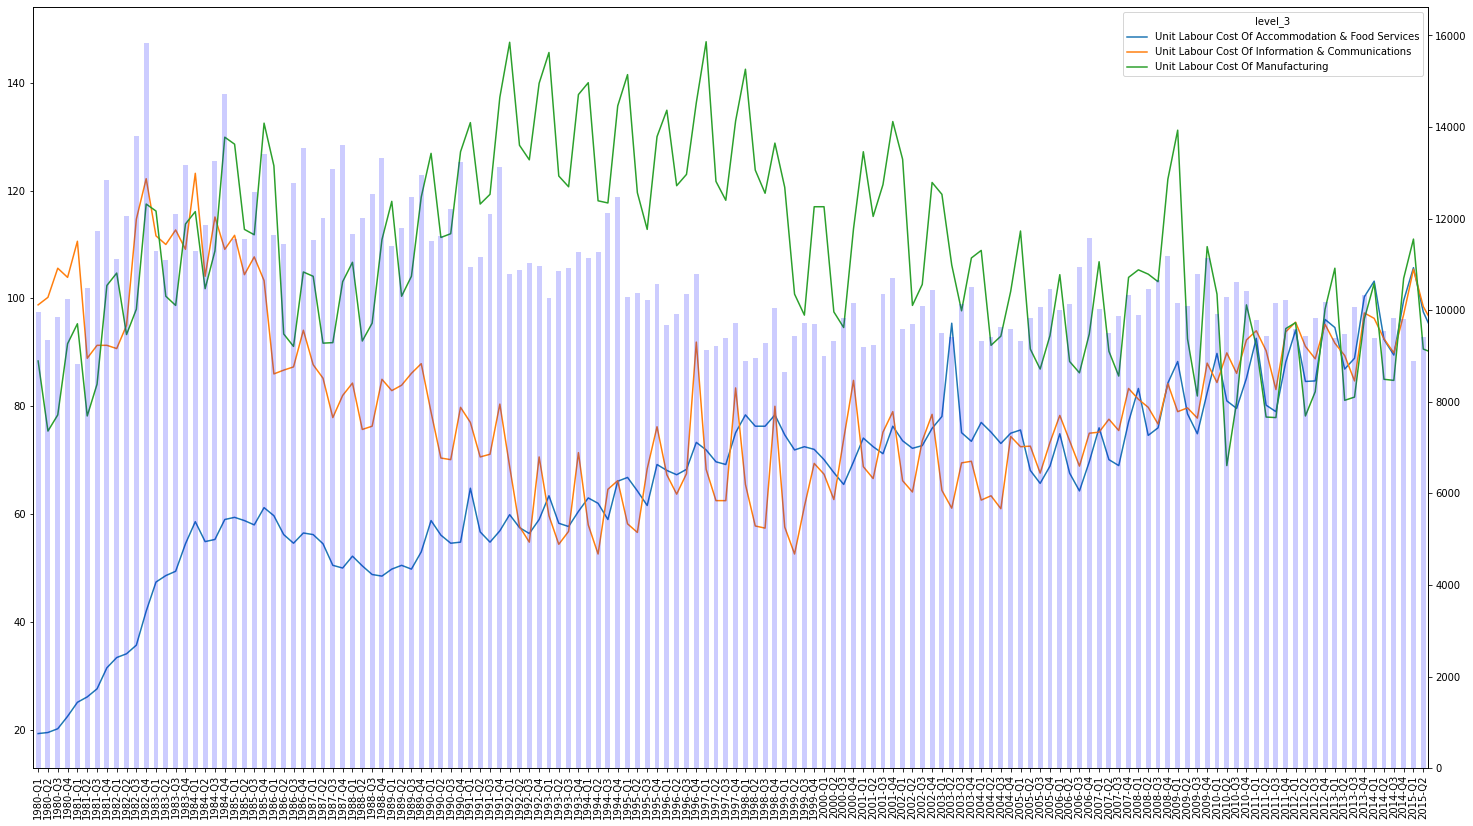

In [48]:
ax = births_df["Total Live-Births By Birth Order"].plot(kind='bar', figsize=(25,14), secondary_y=["Total Live-Births By Birth Order"], color='blue', alpha=0.2)
labour_df.pivot(index="quarter", columns=labour_df.columns[3], values="value").plot(ax=ax)


